In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_AW_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,NaN,NaN,NaN,NaN,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,NaN,76.0,48.0,NaN,NaN,0.171,NaN
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,NaN,60.0,0.0,NaN,NaN,0.349,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	114
float64		column 2	228
float64		column 3	114
float64		column 4	38
float64		column 5	266
float64		column 6	228
float64		column 7	38
float64		column 8	190


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,654.000000,540.000000,654.000000,730.000000,502.000000,540.000000,730.000000,578.000000
mean,3.836391,120.605556,68.698777,20.389041,77.215139,32.004630,0.471990,33.216263
std,3.343411,31.429368,19.965808,15.768103,112.314827,7.648136,0.334168,11.770036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.375000,0.241500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,38.500000,32.300000,0.370000,29.000000
75%,6.000000,139.000000,80.000000,32.000000,125.000000,36.425000,0.628500,41.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,59.400000,2.420000,81.000000


<AxesSubplot:>

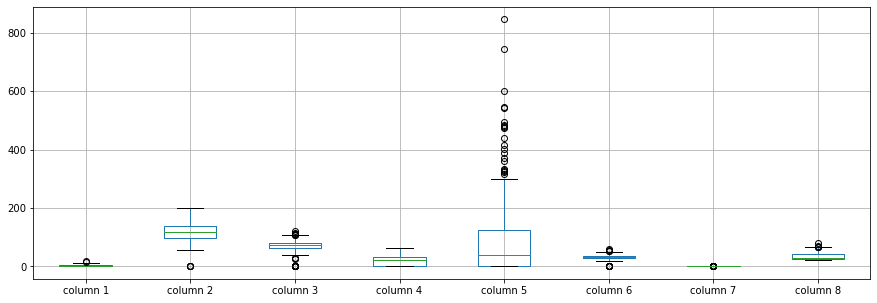

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.836391
column 2    120.605556
column 3     68.698777
column 4     20.389041
column 5     77.215139
column 6     32.004630
column 7      0.471990
column 8     33.216263
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.105019,0.138833,-0.075974,-0.094048,0.016168,-0.023549,0.568311
column 2,0.105019,1.000000,0.082853,-0.011637,0.302582,0.172573,0.164724,0.260535
column 3,0.138833,0.082853,1.000000,0.225952,0.030894,0.172660,0.045475,0.269205
column 4,-0.075974,-0.011637,0.225952,1.000000,0.395058,0.346756,0.181430,-0.159458
column 5,-0.094048,0.302582,0.030894,0.395058,1.000000,0.129291,0.193895,-0.030303
column 6,0.016168,0.172573,0.172660,0.346756,0.129291,1.000000,0.122575,0.043742
column 7,-0.023549,0.164724,0.045475,0.181430,0.193895,0.122575,1.000000,0.036143
column 8,0.568311,0.260535,0.269205,-0.159458,-0.030303,0.043742,0.036143,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+11,8+11+11,8+11+11+11,8+11+11+11+11,8+11+11+11+11+11,8+11+11+11+11,8+11+11+11,8+11+11,8+11,8], vae_layer = False, seed = 11)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 308.9821201960246
Epoch: 1 , loss: 307.93779532114667
Epoch: 2 , loss: 307.32518037160236
Epoch: 3 , loss: 306.34621556599933
Epoch: 4 , loss: 307.0583438873291
Epoch: 5 , loss: 308.39252249399823
Epoch: 6 , loss: 308.4651104609172
Epoch: 7 , loss: 306.25687917073566
Epoch: 8 , loss: 308.26638825734454
Epoch: 9 , loss: 307.80499426523846
Epoch: 10 , loss: 306.6226456960042
Epoch: 11 , loss: 307.16780217488605
Epoch: 12 , loss: 302.6177209218343
Epoch: 13 , loss: 298.4900789260864
Epoch: 14 , loss: 292.56640911102295
Epoch: 15 , loss: 285.79920895894367
Epoch: 16 , loss: 280.4129441579183
Epoch: 17 , loss: 271.9838978449504
Epoch: 18 , loss: 268.55795923868817
Epoch: 19 , loss: 263.17881774902344
Epoch: 20 , loss: 256.5781037012736
Epoch: 21 , loss: 262.6836150487264
Epoch: 22 , loss: 252.86600907643637
Epoch: 23 , loss: 252.21634197235107
Epoch: 24 , loss: 247.72791957855225
Epoch: 25 , loss: 251.851699

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.204315,-136.804689,-39.802386,-34.798611,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...
763,0.000000,-100.856808,0.000000,0.000000,-179.860328,-32.753369,0.0,-62.853083
764,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
766,0.000000,-125.741699,0.000000,0.000000,0.248522,-29.835159,0.0,-46.733080


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(3238.133712697131, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.5605627924235483

In [18]:
new_df.iloc[66,:]

column 1     0.000000
column 2     0.139787
column 3    88.000000
column 4    30.000000
column 5     0.136139
column 6     0.143742
column 7     0.855000
column 8     0.144504
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.000000,148.000000,72.000000,35.000000,0.000000,33.600000,0.627,50.000000
1,1.000000,85.000000,66.000000,29.000000,0.000000,26.600000,0.351,31.000000
2,8.000000,183.000000,64.000000,0.000000,0.000000,23.300000,0.672,32.000000
3,1.000000,89.000000,66.000000,23.000000,94.000000,28.100000,0.167,21.000000
4,0.204315,0.195311,0.197614,0.201389,168.000000,43.100000,2.288,33.000000
...,...,...,...,...,...,...,...,...
763,10.000000,0.143192,76.000000,48.000000,0.139672,0.146631,0.171,0.146917
764,2.000000,122.000000,70.000000,27.000000,0.000000,36.800000,0.340,27.000000
765,5.000000,121.000000,72.000000,23.000000,112.000000,26.200000,0.245,30.000000
766,1.000000,0.258301,60.000000,0.000000,0.248522,0.264841,0.349,0.266920


In [20]:
imputations[-1].to_excel("PID_AW_20.xlsx", index=False, header=False)